In [36]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:


# Filter Data for Specific Job Titles
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values in 'salary_year_avg'
df_DA_US = df_US.dropna(subset=['salary_year_avg'])

In [38]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [39]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#sort by median salary
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# sort by count (fix: do not re-sort by median)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)



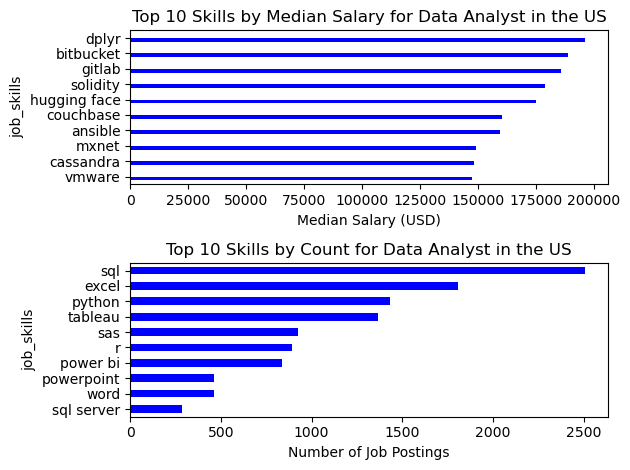

In [44]:
fig, ax = plt.subplots(2,1)
# Plotting the Top 10 Skills by Median Salary and Count for Data Analyst in the US
df_DA_top_pay.plot(kind='barh', ax=ax[0], color='blue', legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Skills by Median Salary for Data Analyst in the US')
ax[0].set_xlabel('Median Salary (USD)')

# Display the counts for the top skills and total postings
df_DA_skills['count'].plot(kind='barh', ax=ax[1], color='blue', legend=False)
# ax[1].set_xlim(ax[0].get_xlim())  # Align x-axis limits
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Skills by Count for Data Analyst in the US')
ax[1].set_xlabel('Number of Job Postings')
plt.tight_layout()
plt.show()

In [43]:
# Display the counts for the top skills and total postings
display(df_DA_skills['count'])
print('Total Data Analyst postings in US:', len(df_DA_US))

job_skills
sql           2508
excel         1808
python        1431
tableau       1364
sas            926
r              893
power bi       838
powerpoint     462
word           461
sql server     286
Name: count, dtype: int64

Total Data Analyst postings in US: 17440
